In [1]:
import deeptrack as dt
from deeptrack.models.yolo import utils
import numpy as np
import matplotlib.pyplot as plt

from simulation import *

c:\Users\santh\Desktop\VScode\Particle_Chamber\deeptrack\backend\_config.py:11: UserWarning: cupy not installed. GPU-accelerated simulations will not be possible
  warnings.warn(
c:\Users\santh\Desktop\VScode\Particle_Chamber\deeptrack\backend\_config.py:25: UserWarning: cupy not installed, CPU acceleration not enabled
  warnings.warn("cupy not installed, CPU acceleration not enabled")


In [2]:
sim= MultiParticle(
    
    
    n_particles = lambda: int(np.random.rand()*10) + 15,
        
    
)
starting_value = dt.Value(lambda: np.ones((IMAGE_SIZE, IMAGE_SIZE)))

sim= starting_value >> MultiParticle(
    n_particles = lambda: int(np.random.rand()*10) + 15,
)

particle =  sim[0]
pos =  sim[1]
rad =  sim[2]






In [3]:
print(np.shape(particle.resolve()))

Image((100, 100))


In [5]:
gradient = dt.IlluminationGradient(
    gradient=[.5e-3, 0e-3],#lambda: 1e-3 + np.random.randn(2) * 1e-3,
)

class Normalize(dt.Feature):
    def __init__(
        self, **kwargs
    ):
        super().__init__( **kwargs)

    def get(self, image, **kwargs):
        image = image / np.max(image)
        return image

normalization = Normalize()

gauss = dt.Gaussian(mu = 0, sigma = .01)

import scipy
#Smoothing
kernel = np.ones((3, 3)) / 15
smoothing = dt.Lambda(lambda: lambda image: scipy.ndimage.filters.convolve(image, kernel)) 

particle = particle >> smoothing >> gauss >> normalization 

In [6]:
"""def get_label(a, b):
    a = a.resolve()
    b = b.resolve()
    n = int(np.shape(a)[0])
    label = np.zeros((n,4))

    for i in range(n):
        label[i,:] = [int(a[i, 0]), int(a[i, 1]), b[i], b[i]]

    
    return label #(np.asarray(a.resolve()), np.asarray(b.resolve()))"""

def get_label(rad, pos):
    rad = np.array(rad)
    pos = np.array(pos)
        
    n = np.shape(rad)[0]  
    label = np.zeros((n, 4))

    for i in range ( n ):
        label[i, : ] = [int(pos[i, 0]), int(pos[i, 1]), rad[i,0], rad[i,0]]
    
    #print(label)
    return label

In [7]:


label_func = particle >> dt.Lambda(lambda rad, pos: lambda x: get_label(rad, pos), rad=rad, pos=pos)
#bboxes.resolve()
#data = particle & bboxes
#print(data.resolve())


print(label_func.resolve())

Image(array([[ 1.        ,  0.        ,  2.52818207,  2.52818207],
       [56.        , 51.        ,  2.9516708 ,  2.9516708 ],
       [55.        , 67.        ,  2.33387975,  2.33387975],
       [38.        , 99.        ,  2.27528094,  2.27528094],
       [ 8.        , 26.        ,  2.60161431,  2.60161431],
       [71.        , 48.        ,  2.16346127,  2.16346127],
       [ 2.        , 82.        ,  2.87095467,  2.87095467],
       [87.        , 42.        ,  2.28792135,  2.28792135],
       [25.        , 38.        ,  2.30018787,  2.30018787],
       [69.        , 66.        ,  2.09319448,  2.09319448],
       [ 6.        , 93.        ,  2.47486613,  2.47486613],
       [93.        , 43.        ,  2.48913183,  2.48913183],
       [69.        , 96.        ,  2.97131773,  2.97131773],
       [66.        , 36.        ,  2.01710838,  2.01710838],
       [84.        , 10.        ,  2.79364848,  2.79364848],
       [56.        , 54.        ,  2.47064037,  2.47064037]]))


[[19.         72.          2.71566184  2.71566184]
 [87.         58.          2.54832406  2.54832406]
 [ 1.          5.          2.00296596  2.00296596]
 [71.         93.          2.65278025  2.65278025]
 [40.         49.          2.38454996  2.38454996]
 [23.         31.          2.3744425   2.3744425 ]
 [23.         85.          2.98730224  2.98730224]
 [ 1.         24.          2.83332583  2.83332583]
 [ 9.         80.          2.81570844  2.81570844]
 [52.         96.          2.48504494  2.48504494]
 [82.         30.          2.6905983   2.6905983 ]
 [67.         29.          2.65476771  2.65476771]
 [14.         97.          2.02800348  2.02800348]
 [52.         16.          2.91645015  2.91645015]
 [58.         96.          2.49982431  2.49982431]
 [63.         78.          2.46556952  2.46556952]
 [43.         38.          2.83474695  2.83474695]]
Image(array([[19., 72.],
       [87., 58.],
       [ 1.,  5.],
       [71., 93.],
       [40., 49.],
       [23., 31.],
       [23.,

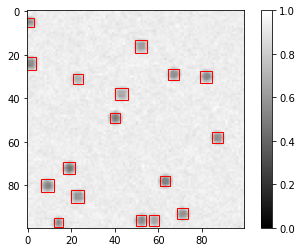

[[44.         76.          2.58728737  2.58728737]
 [ 2.         28.          2.80571638  2.80571638]
 [86.         29.          2.13304793  2.13304793]
 [72.         77.          2.53607072  2.53607072]
 [ 9.         82.          2.74604452  2.74604452]
 [13.         36.          2.12719438  2.12719438]
 [33.         42.          2.2882383   2.2882383 ]
 [84.         28.          2.20798283  2.20798283]
 [57.         40.          2.7369904   2.7369904 ]
 [ 7.          3.          2.79373541  2.79373541]
 [32.         10.          2.82754658  2.82754658]
 [ 2.          5.          2.56307021  2.56307021]
 [91.         55.          2.55294022  2.55294022]
 [ 5.         61.          2.36958985  2.36958985]
 [94.         85.          2.24860039  2.24860039]
 [45.          4.          2.93925908  2.93925908]
 [13.          2.          2.90649986  2.90649986]
 [73.         63.          2.50350413  2.50350413]
 [44.         51.          2.1462033   2.1462033 ]]
Image(array([[44., 76.],
     

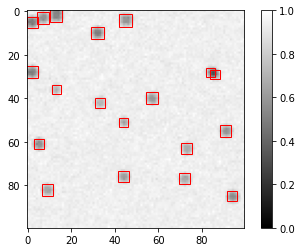

[[75.         30.          2.06451031  2.06451031]
 [94.          4.          2.34810741  2.34810741]
 [47.         99.          2.40540936  2.40540936]
 [49.         49.          2.13183706  2.13183706]
 [93.         21.          2.19258202  2.19258202]
 [53.         38.          2.64935226  2.64935226]
 [99.         71.          2.97129063  2.97129063]
 [79.          6.          2.53221254  2.53221254]
 [74.         59.          2.35637709  2.35637709]
 [ 9.         15.          2.06483368  2.06483368]
 [64.         60.          2.09301498  2.09301498]
 [40.         53.          2.61562962  2.61562962]
 [80.          2.          2.68260039  2.68260039]
 [25.         82.          2.93490543  2.93490543]
 [19.         65.          2.27327443  2.27327443]
 [50.         74.          2.56063708  2.56063708]
 [32.         79.          2.48904614  2.48904614]
 [87.         63.          2.15819587  2.15819587]
 [48.         84.          2.2846928   2.2846928 ]
 [30.         93.          2.63

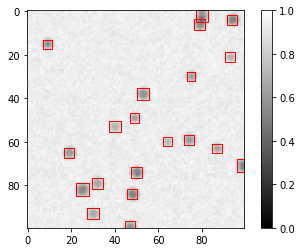

[[ 2.         24.          2.58688284  2.58688284]
 [67.         93.          2.78384884  2.78384884]
 [22.         93.          2.55613996  2.55613996]
 [41.         45.          2.62889521  2.62889521]
 [99.         37.          2.32793184  2.32793184]
 [64.         36.          2.81513807  2.81513807]
 [20.         70.          2.90327212  2.90327212]
 [16.         97.          2.77989152  2.77989152]
 [72.         87.          2.3413894   2.3413894 ]
 [81.         47.          2.04734749  2.04734749]
 [72.         99.          2.64532675  2.64532675]
 [25.         17.          2.58008596  2.58008596]
 [45.         39.          2.09592308  2.09592308]
 [93.         81.          2.72867329  2.72867329]
 [25.         63.          2.21597466  2.21597466]
 [50.         46.          2.44935239  2.44935239]
 [76.         11.          2.10271981  2.10271981]
 [91.          9.          2.53991301  2.53991301]
 [71.         77.          2.35885752  2.35885752]
 [95.         86.          2.50

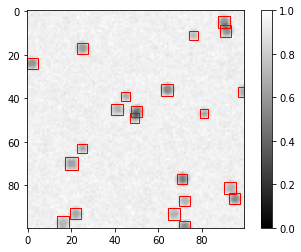

[[73.         24.          2.68351401  2.68351401]
 [58.          8.          2.1047001   2.1047001 ]
 [46.         36.          2.35684261  2.35684261]
 [12.         29.          2.66184022  2.66184022]
 [78.         62.          2.21863646  2.21863646]
 [98.         42.          2.18100391  2.18100391]
 [26.         35.          2.31708791  2.31708791]
 [78.         95.          2.46677526  2.46677526]
 [16.         83.          2.76526584  2.76526584]
 [17.         46.          2.49106353  2.49106353]
 [46.         56.          2.41432104  2.41432104]
 [82.          6.          2.0721396   2.0721396 ]
 [ 5.         48.          2.06501384  2.06501384]
 [67.         79.          2.82728836  2.82728836]
 [ 7.         58.          2.17308998  2.17308998]
 [46.         43.          2.24264868  2.24264868]]
Image(array([[73., 24.],
       [58.,  8.],
       [46., 36.],
       [12., 29.],
       [78., 62.],
       [98., 42.],
       [26., 35.],
       [78., 95.],
       [16., 83.],
      

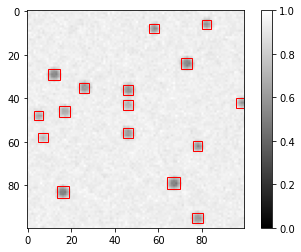

In [8]:
NUMBER_OF_IMAGES = 5

for _ in range(NUMBER_OF_IMAGES):
    particle.update()
    pos = pos.update()
    rad = rad.update()
    
    bboxes = label_func.resolve()

    
    print(np.array(bboxes))
    image_of_particle = particle.resolve()
    

    
    n = np.shape(bboxes)[0]
    position_of_particles = bboxes[:,0:2]
    print(position_of_particles)
    radius_of_particles = bboxes[:,2] 
    
    plt.imshow(image_of_particle.reshape((IMAGE_SIZE, IMAGE_SIZE)), cmap="gray", vmin = 0)
    plt.colorbar()
    ax = plt.gca()
    for i in range(int(n)):
        rect = plt.Rectangle((position_of_particles[i,0]-radius_of_particles[i],position_of_particles[i,1]-radius_of_particles[i]),2*radius_of_particles[i],2*radius_of_particles[i],linewidth=1,edgecolor='r',facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)
    
    
    #plt.scatter(position_of_particles[:,0], position_of_particles[:,1], marker='+', edgecolors="r", linewidth=2)
    plt.show()

In [12]:
from deeptrack.models.yolo.yolo import YOLOv3

model = YOLOv3(
    (100, 100),
    1,
)

model.compile(optimizer="adam")

ValueError: Input 0 of layer conv2d_75 is incompatible with the layer: : expected min_ndim=4, found ndim=3. Full shape received: (None, 100, 100)

In [13]:
from deeptrack.models.yolo.dataset import YoloDataGenerator

data = particle & bboxes

generator = YoloDataGenerator(
    feature=data,
    input_size=np.array([100]),
    num_class=1,
    label_function=lambda d: np.array(d[1:]),
    batch_size=4,
    min_data_size=100,
    max_data_size=200,
)

generator.anchors = model.anchors

In [11]:
with generator:
    model.fit(generator, epochs=50)

Generating 109 / 100 samples before starting training


ValueError: not enough values to unpack (expected 3, got 2)